In [19]:
import pandas as pd
import numpy as np
from kiwipiepy import Kiwi
import copy
import re
from kiwipiepy.utils import Stopwords
import nltk

from wordcloud import WordCloud # 워드클라우드 제작 라이브러리
import pandas as pd # 데이터 프레임 라이브러리
import numpy as np # 행렬 라이브러리
import matplotlib.pyplot as plt # 워드클라우드 시각화 라이브러리
%matplotlib inline
import konlpy

In [20]:
df_2020 = pd.read_csv('여행지_전처리데이터/20여행지_전처리.csv', encoding='utf-8')
df_2021 = pd.read_csv('여행지_전처리데이터/21여행지_전처리.csv', encoding='utf-8')
df_2022 = pd.read_csv('여행지_전처리데이터/22여행지_전처리.csv', encoding='utf-8')
df_2023 = pd.read_csv('여행지_전처리데이터/23여행지_전처리.csv', encoding='utf-8')
df_2024 = pd.read_csv('여행지_전처리데이터/24여행지_전처리.csv', encoding='utf-8')

In [21]:
combined_df = pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True)
combined_df.shape

(4803, 7)

## 1.유행어가 들어있는 행만 살리기

In [22]:
df = [df_2020, df_2021, df_2022, df_2023, df_2024]

In [23]:
# 여행 텍스트 파일에서 여행지 및 여행 관련 키워드 읽기
def load_inwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        inwords_list = file.read().splitlines()
    return inwords_list

# 파일에서 여행 목록 로드
inwords_file_path = '../travel.txt'
file_inwords = load_inwords(inwords_file_path)

# 여행 리스트 중복 삭제
all_inwords = list(set(file_inwords))

In [24]:
len(all_inwords)

200

In [25]:
# 단어 빈도 계산 및 상위 단어 추출 
def explode_and_count(df, column):
    exploded = df[column].str.split().explode()  # 문자열을 단어 단위로 나누어 행으로 펼침
    word_counts = exploded.value_counts().reset_index()  # 단어 빈도 계산
    word_counts.columns = ['word', 'count']  # 컬럼명 설정
    return word_counts

In [26]:
## df_2020

# 각 칼럼에 대해 단어 빈도 계산
word_counts_list_2020 = []

for column in ['preprocessed_body']:
    word_counts = explode_and_count(df_2020, column)
    word_counts_list_2020.append(word_counts)

# 모든 칼럼의 단어 빈도 합산 및 정렬
all_words_body_2020 = pd.concat(word_counts_list_2020).groupby('word').sum().reset_index().sort_values(by='count', ascending=False)

# 한 글자 단어 제외
all_words_body_2020 = all_words_body_2020[all_words_body_2020['word'].str.len() > 1]

# all_inwords 리스트에 있는 단어들만 필터링
all_words_body_2020 = all_words_body_2020[all_words_body_2020['word'].isin(all_inwords)]

# 상위 10개 단어 출력
top_10_words_2020 = all_words_body_2020.head(10)
top_10_words_2020

,word,count
1899,국내,1788
7401,바다,1261
1399,공원,1110
17538,제주,907
16641,자연,878
23134,호텔,860
19782,카페,760
8762,부산,736
17403,정원,699
8144,벚꽃,686


In [27]:
## df_2021

# 각 칼럼에 대해 단어 빈도 계산
word_counts_list_2021 = []

for column in ['preprocessed_body']:
    word_counts = explode_and_count(df_2021, column)
    word_counts_list_2021.append(word_counts)

# 모든 칼럼의 단어 빈도 합산 및 정렬
all_words_body_2021 = pd.concat(word_counts_list_2021).groupby('word').sum().reset_index().sort_values(by='count', ascending=False)

# 한 글자 단어 제외
all_words_body_2021 = all_words_body_2021[all_words_body_2021['word'].str.len() > 1]

# all_inwords 리스트에 있는 단어들만 필터링
all_words_body_2021 = all_words_body_2021[all_words_body_2021['word'].isin(all_inwords)]

# 상위 10개 단어 출력
top_10_words_2021 = all_words_body_2021.head(10)
top_10_words_2021

,word,count
1923,국내,1904
7326,바다,1478
1389,공원,1476
22337,해수욕장,926
19628,카페,920
16935,전망대,867
17367,제주,854
17237,정원,827
8073,벚꽃,787
16414,자연,787


In [28]:
## df_2022

# 각 칼럼에 대해 단어 빈도 계산
word_counts_list_2022 = []

for column in ['preprocessed_body']:
    word_counts = explode_and_count(df_2022, column)
    word_counts_list_2022.append(word_counts)

# 모든 칼럼의 단어 빈도 합산 및 정렬
all_words_body_2022 = pd.concat(word_counts_list_2022).groupby('word').sum().reset_index().sort_values(by='count', ascending=False)

# 한 글자 단어 제외
all_words_body_2022 = all_words_body_2022[all_words_body_2022['word'].str.len() > 1]

# all_inwords 리스트에 있는 단어들만 필터링
all_words_body_2022 = all_words_body_2022[all_words_body_2022['word'].isin(all_inwords)]

# 상위 10개 단어 출력
top_10_words_2022 = all_words_body_2022.head(10)
top_10_words_2022

,word,count
1853,국내,1841
1349,공원,1584
7150,바다,1280
16993,제주,1209
7913,벚꽃,1067
412,강원도,844
10032,서울,831
19205,카페,809
3830,단풍,787
22304,호텔,724


In [29]:
## df_2023

# 각 칼럼에 대해 단어 빈도 계산
word_counts_list_2023 = []

for column in ['preprocessed_body']:
    word_counts = explode_and_count(df_2023, column)
    word_counts_list_2023.append(word_counts)

# 모든 칼럼의 단어 빈도 합산 및 정렬
all_words_body_2023 = pd.concat(word_counts_list_2023).groupby('word').sum().reset_index().sort_values(by='count', ascending=False)

# 한 글자 단어 제외
all_words_body_2023 = all_words_body_2023[all_words_body_2023['word'].str.len() > 1]

# all_inwords 리스트에 있는 단어들만 필터링
all_words_body_2023 = all_words_body_2023[all_words_body_2023['word'].isin(all_inwords)]

# 상위 10개 단어 출력
top_10_words_2023 = all_words_body_2023.head(10)
top_10_words_2023

,word,count
1759,국내,1680
1281,공원,1498
7113,바다,1117
15614,일본,1035
7820,벚꽃,1014
22142,호텔,890
16750,제주,811
18864,카페,783
9886,서울,762
15871,자연,721


In [30]:
## df_2024

# 각 칼럼에 대해 단어 빈도 계산
word_counts_list_2024 = []

for column in ['preprocessed_body']:
    word_counts = explode_and_count(df_2024, column)
    word_counts_list_2024.append(word_counts)

# 모든 칼럼의 단어 빈도 합산 및 정렬
all_words_body_2024 = pd.concat(word_counts_list_2024).groupby('word').sum().reset_index().sort_values(by='count', ascending=False)

# 한 글자 단어 제외
all_words_body_2024 = all_words_body_2024[all_words_body_2024['word'].str.len() > 1]

# all_inwords 리스트에 있는 단어들만 필터링
all_words_body_2024 = all_words_body_2024[all_words_body_2024['word'].isin(all_inwords)]

# 상위 10개 단어 출력
top_10_words_2024 = all_words_body_2024.head(10)
top_10_words_2024

,word,count
7789,벚꽃,2850
1297,공원,1576
1763,국내,1315
15807,일본,1276
22437,호텔,883
9917,서울,852
510,개화,671
7080,바다,651
16947,제주,624
19117,카페,611


## 2. 워드 클라우드

참고 사이트: https://serendipity77.tistory.com/entry/영화동감-영화동감-댓글-리뷰-워드-클라우드wordcloud로-만들어보기파이썬-Python 

[엑셀 자동화로 칼퇴하는 김대리의 고군분투기:티스토리]

In [31]:
font_path='C:\\Windows\\Fonts\\malgun.ttf'

### df_2020

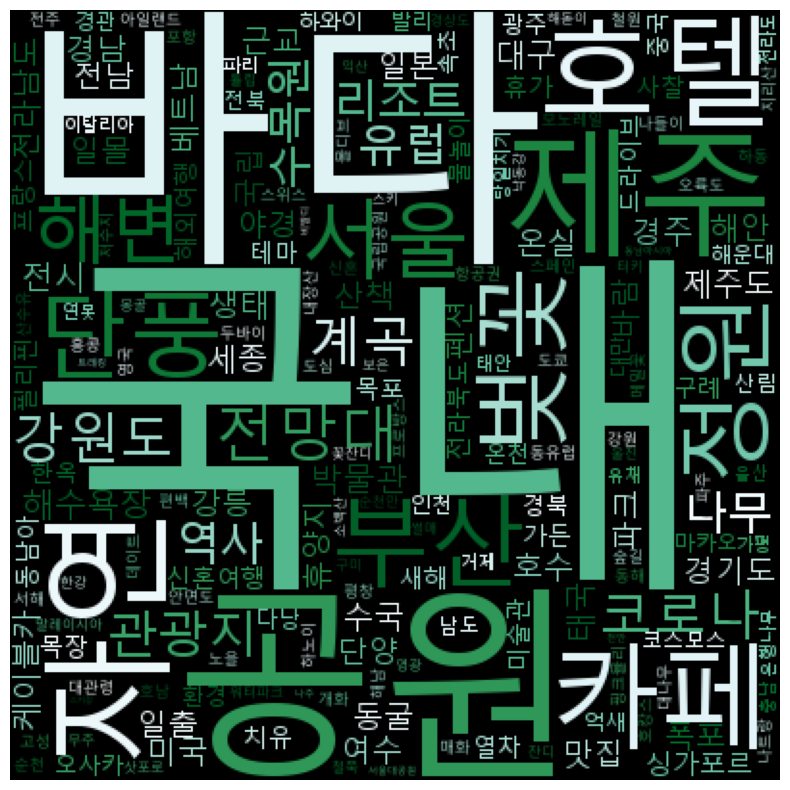

In [32]:
dic_word = all_words_body_2020.set_index('word').to_dict()['count']
## colormap 참고 사이트: https://wonhwa.tistory.com/20

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'black',
               colormap = 'BuGn')
               ## 'Blues': 파란색 그라데이션
               ## 'BuGn': 청록색
               ## 'BuPu': 진보라 ~ 연한 파란색 ~ 하얀색 
               ## 'GnBu': 진파랑 ~ 연한 초록색 ~ 하얀색
               ## 'Greys': 검은색 ~ 회색 ~ 하얀색
               ## 'OrRd': 진빨강 ~ 연한 오렌지 ~ 하얀색
               ## 'Pastel1': 파스텔 색
               ## 'Pastel2': 파스텔 색
               ## 'PuBu': 진파랑 ~ 핑크 ~ 하얀색
               ## 'PuRd': 자주 ~ 핑크 ~ 하얀색
               ## 'Purples': 보라색
               ## 'RdPu': 보라 ~ 자주 ~ 핑크
               ## 'Reds': 빨강
               ## 'Wistia': 주황 ~ 형광 노랑
               ## 'YlGnBu': 파랑 ~ 초록 ~ 노랑


img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
## plt.savefig('동감_워드클라우드') # 파일 저장

#### 꾸미기

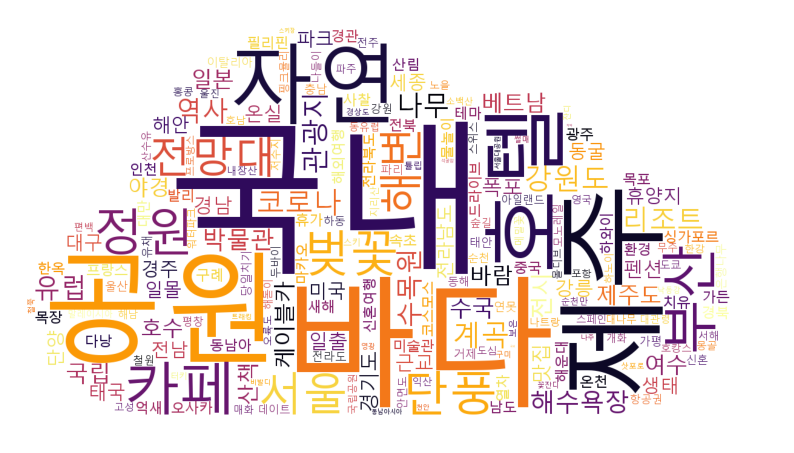

In [33]:
import PIL
icon = PIL.Image.open('../cloud.png')

img = PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, (0,0))
img = np.array(img)

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'white', 
               mask = img, colormap = 'inferno')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
# plt.savefig('동감_워드클라우드_꾸밈') # 파일 저장

### df_2021

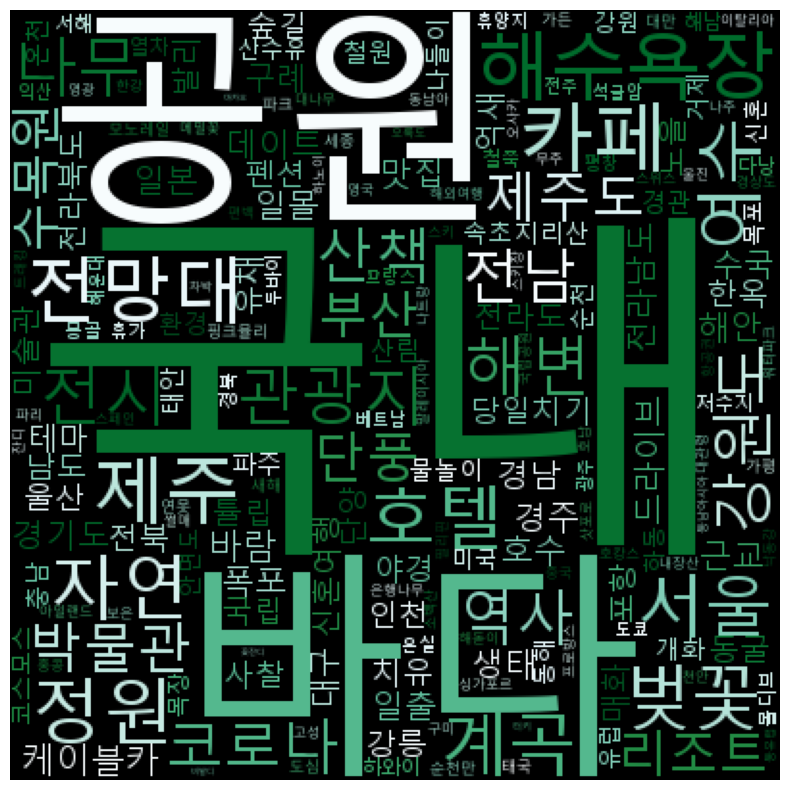

In [34]:
dic_word = all_words_body_2021.set_index('word').to_dict()['count']
## colormap 참고 사이트: https://wonhwa.tistory.com/20

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'black',
               colormap = 'BuGn')
               ## 'Blues': 파란색 그라데이션
               ## 'BuGn': 청록색
               ## 'BuPu': 진보라 ~ 연한 파란색 ~ 하얀색 
               ## 'GnBu': 진파랑 ~ 연한 초록색 ~ 하얀색
               ## 'Greys': 검은색 ~ 회색 ~ 하얀색
               ## 'OrRd': 진빨강 ~ 연한 오렌지 ~ 하얀색
               ## 'Pastel1': 파스텔 색
               ## 'Pastel2': 파스텔 색
               ## 'PuBu': 진파랑 ~ 핑크 ~ 하얀색
               ## 'PuRd': 자주 ~ 핑크 ~ 하얀색
               ## 'Purples': 보라색
               ## 'RdPu': 보라 ~ 자주 ~ 핑크
               ## 'Reds': 빨강
               ## 'Wistia': 주황 ~ 형광 노랑
               ## 'YlGnBu': 파랑 ~ 초록 ~ 노랑


img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
## plt.savefig('동감_워드클라우드') # 파일 저장

#### 꾸미기

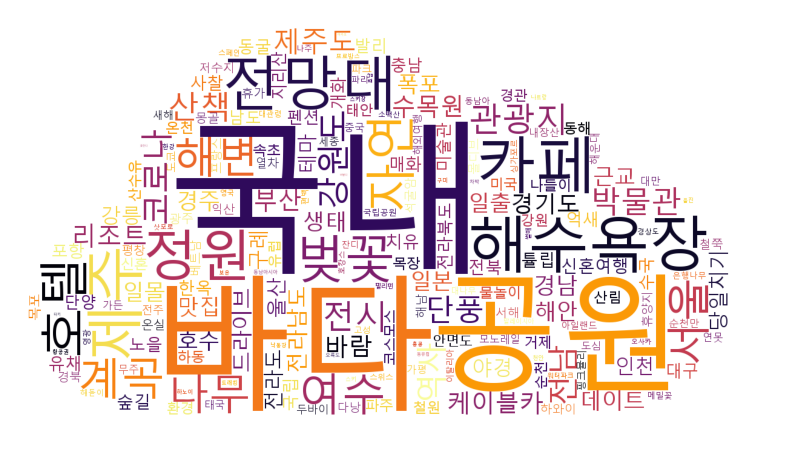

In [35]:
import PIL
icon = PIL.Image.open('../cloud.png')

img = PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, (0,0))
img = np.array(img)

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'white', 
               mask = img, colormap = 'inferno')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
# plt.savefig('동감_워드클라우드_꾸밈') # 파일 저장

### df_2022

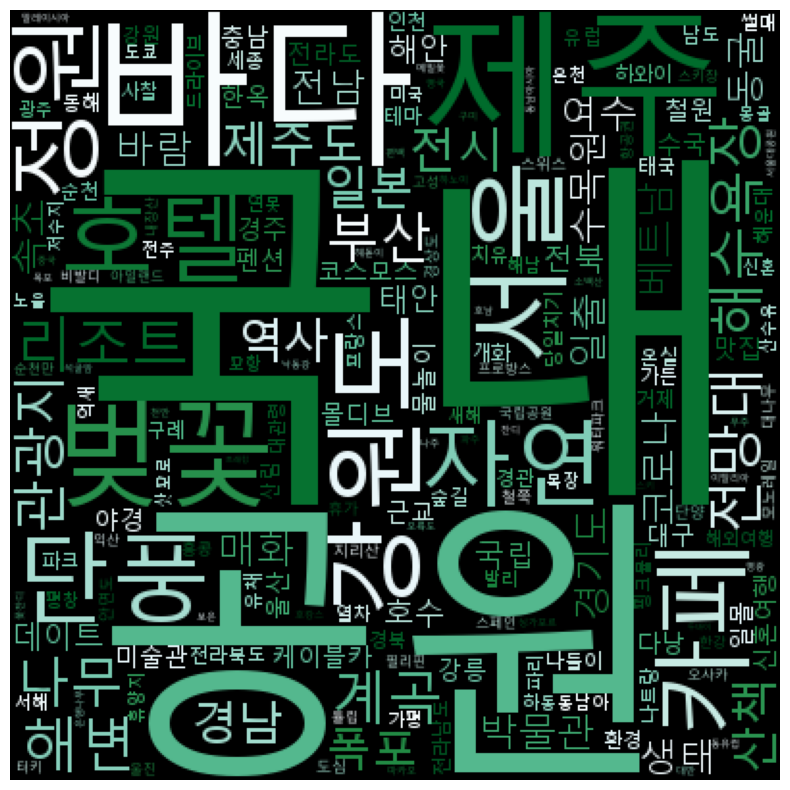

In [36]:
dic_word = all_words_body_2022.set_index('word').to_dict()['count']
## colormap 참고 사이트: https://wonhwa.tistory.com/20

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'black',
               colormap = 'BuGn')
               ## 'Blues': 파란색 그라데이션
               ## 'BuGn': 청록색
               ## 'BuPu': 진보라 ~ 연한 파란색 ~ 하얀색 
               ## 'GnBu': 진파랑 ~ 연한 초록색 ~ 하얀색
               ## 'Greys': 검은색 ~ 회색 ~ 하얀색
               ## 'OrRd': 진빨강 ~ 연한 오렌지 ~ 하얀색
               ## 'Pastel1': 파스텔 색
               ## 'Pastel2': 파스텔 색
               ## 'PuBu': 진파랑 ~ 핑크 ~ 하얀색
               ## 'PuRd': 자주 ~ 핑크 ~ 하얀색
               ## 'Purples': 보라색
               ## 'RdPu': 보라 ~ 자주 ~ 핑크
               ## 'Reds': 빨강
               ## 'Wistia': 주황 ~ 형광 노랑
               ## 'YlGnBu': 파랑 ~ 초록 ~ 노랑


img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
## plt.savefig('동감_워드클라우드') # 파일 저장

#### 꾸미기

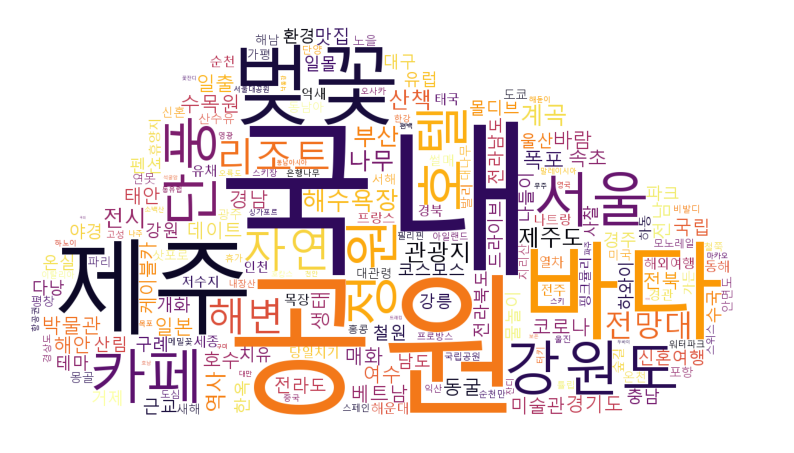

In [37]:
import PIL
icon = PIL.Image.open('../cloud.png')

img = PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, (0,0))
img = np.array(img)

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'white', 
               mask = img, colormap = 'inferno')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
# plt.savefig('동감_워드클라우드_꾸밈') # 파일 저장

### df_2023

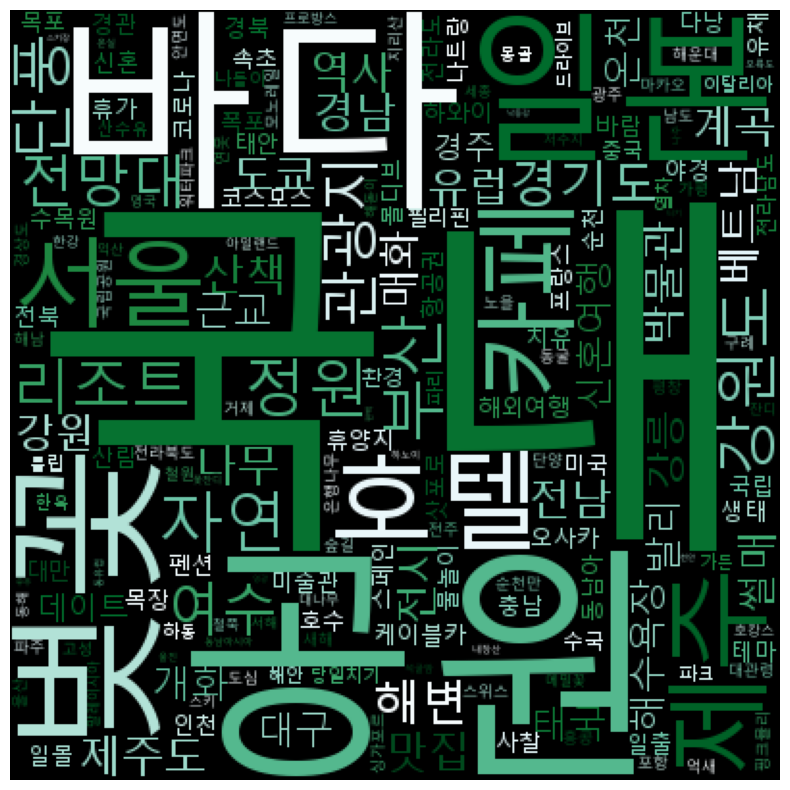

In [38]:
dic_word = all_words_body_2023.set_index('word').to_dict()['count']
## colormap 참고 사이트: https://wonhwa.tistory.com/20

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'black',
               colormap = 'BuGn')
               ## 'Blues': 파란색 그라데이션
               ## 'BuGn': 청록색
               ## 'BuPu': 진보라 ~ 연한 파란색 ~ 하얀색 
               ## 'GnBu': 진파랑 ~ 연한 초록색 ~ 하얀색
               ## 'Greys': 검은색 ~ 회색 ~ 하얀색
               ## 'OrRd': 진빨강 ~ 연한 오렌지 ~ 하얀색
               ## 'Pastel1': 파스텔 색
               ## 'Pastel2': 파스텔 색
               ## 'PuBu': 진파랑 ~ 핑크 ~ 하얀색
               ## 'PuRd': 자주 ~ 핑크 ~ 하얀색
               ## 'Purples': 보라색
               ## 'RdPu': 보라 ~ 자주 ~ 핑크
               ## 'Reds': 빨강
               ## 'Wistia': 주황 ~ 형광 노랑
               ## 'YlGnBu': 파랑 ~ 초록 ~ 노랑


img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
## plt.savefig('동감_워드클라우드') # 파일 저장

#### 꾸미기

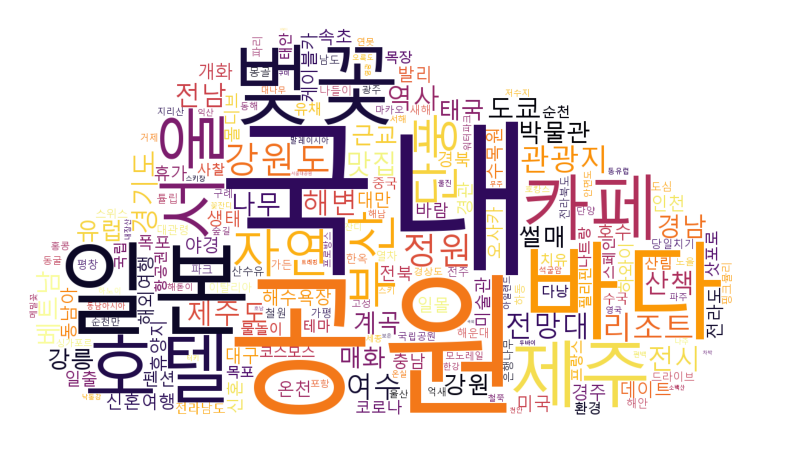

In [39]:
import PIL
icon = PIL.Image.open('../cloud.png')

img = PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, (0,0))
img = np.array(img)

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'white', 
               mask = img, colormap = 'inferno')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
# plt.savefig('동감_워드클라우드_꾸밈') # 파일 저장

### df_2024

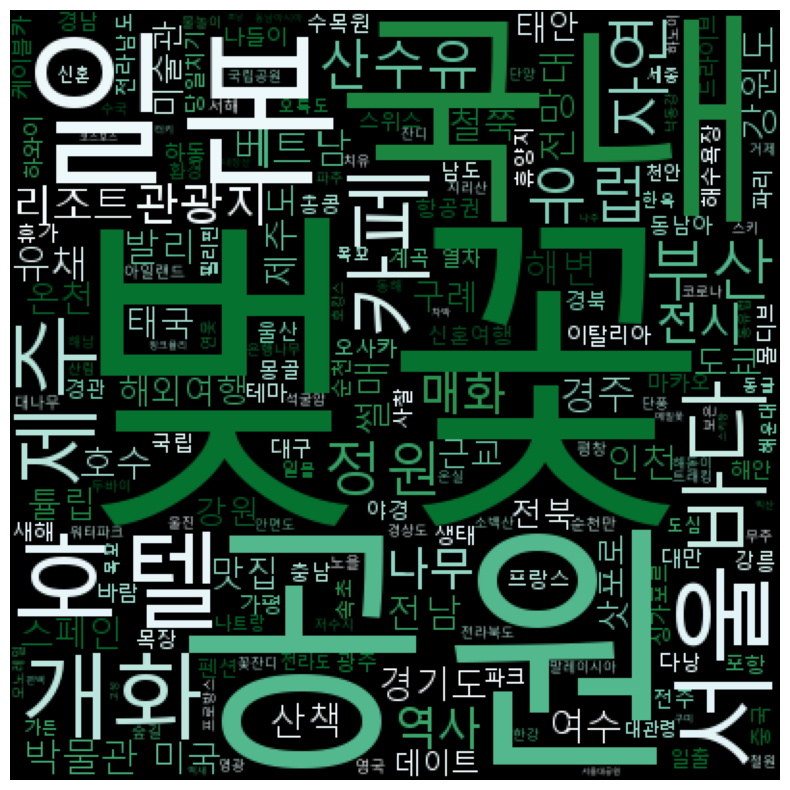

In [40]:
dic_word = all_words_body_2024.set_index('word').to_dict()['count']
## colormap 참고 사이트: https://wonhwa.tistory.com/20

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'black',
               colormap = 'BuGn')
               ## 'Blues': 파란색 그라데이션
               ## 'BuGn': 청록색
               ## 'BuPu': 진보라 ~ 연한 파란색 ~ 하얀색 
               ## 'GnBu': 진파랑 ~ 연한 초록색 ~ 하얀색
               ## 'Greys': 검은색 ~ 회색 ~ 하얀색
               ## 'OrRd': 진빨강 ~ 연한 오렌지 ~ 하얀색
               ## 'Pastel1': 파스텔 색
               ## 'Pastel2': 파스텔 색
               ## 'PuBu': 진파랑 ~ 핑크 ~ 하얀색
               ## 'PuRd': 자주 ~ 핑크 ~ 하얀색
               ## 'Purples': 보라색
               ## 'RdPu': 보라 ~ 자주 ~ 핑크
               ## 'Reds': 빨강
               ## 'Wistia': 주황 ~ 형광 노랑
               ## 'YlGnBu': 파랑 ~ 초록 ~ 노랑


img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
## plt.savefig('동감_워드클라우드') # 파일 저장

#### 꾸미기

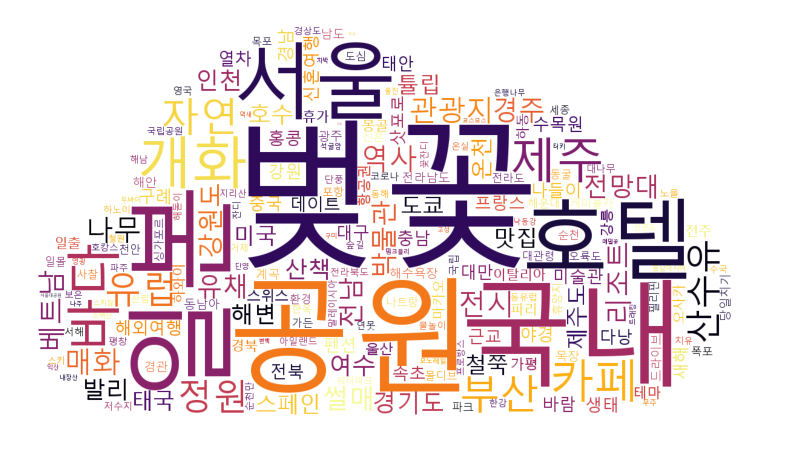

In [41]:
import PIL
icon = PIL.Image.open('../cloud.png')

img = PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, (0,0))
img = np.array(img)

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'white', 
               mask = img, colormap = 'inferno')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
# plt.savefig('동감_워드클라우드_꾸밈') # 파일 저장